In [1]:
from dotenv import load_dotenv
from functions.MySQL_io import MySQLConnection
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
load_dotenv()

user = os.getenv('SQL_USER')
password = os.getenv('SQL_PASSWORD')
database = os.getenv('DATABASE')
port = os.getenv('SQL_PORT')
server = os.getenv('SQL_SERVER')

In [4]:
con = MySQLConnection(port, database, user, password, server)

lap_data = con.run_query(query='''
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN year <= 2022 THEN CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END ELSE 0 END FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        0 AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 1 and
    LapTimeQ is not NULL
    UNION ALL
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END AS FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        CASE WHEN isnull(LapTimeFP3) THEN 1 ELSE 0 END AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 0 and
    LapTimeQ is not NULL 
    ''')

# Data Cleaning

In [5]:
lap_data = lap_data.astype(float)

In [6]:
lap_data.count()

LapTimeFP1          2531
CompoundFP1         2531
AirTempFP1          2531
RainfallFP1         2531
TrackTempFP1        2531
FP1_Missing_Flag    2531
LapTimeFP2          2531
CompoundFP2         2531
AirTempFP2          2531
RainfallFP2         2531
TrackTempFP2        2531
FP2_Missing_Flag    2531
LapTimeFP3          2531
CompoundFP3         2531
AirTempFP3          2531
RainfallFP3         2531
TrackTempFP3        2531
FP3_Missing_Flag    2531
LapTimeQ            2531
AirTempQ            2531
RainfallQ           2531
is_sprint           2531
traction            2531
tyre_stress         2531
asphalt_grip        2531
braking             2531
asphalt_abrasion    2531
lateral_force       2531
track_evolution     2531
downforce           2531
dtype: int64

In [7]:
lap_data.head()

,LapTimeFP1,CompoundFP1,AirTempFP1,RainfallFP1,TrackTempFP1,FP1_Missing_Flag,LapTimeFP2,CompoundFP2,AirTempFP2,RainfallFP2,...,RainfallQ,is_sprint,traction,tyre_stress,asphalt_grip,braking,asphalt_abrasion,lateral_force,track_evolution,downforce
0,88.449,2.0,25.4,0.0,46.9,0.0,91.188,1.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
1,88.163,1.0,25.5,0.0,47.2,0.0,90.800,2.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
2,88.873,2.0,25.9,0.0,49.0,0.0,91.289,1.0,25.3,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
3,87.828,1.0,26.1,0.0,48.8,0.0,90.277,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
4,89.597,2.0,25.6,0.0,47.7,0.0,92.041,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0


In [8]:
lap_data.isna().sum()

LapTimeFP1          0
CompoundFP1         0
AirTempFP1          0
RainfallFP1         0
TrackTempFP1        0
FP1_Missing_Flag    0
LapTimeFP2          0
CompoundFP2         0
AirTempFP2          0
RainfallFP2         0
TrackTempFP2        0
FP2_Missing_Flag    0
LapTimeFP3          0
CompoundFP3         0
AirTempFP3          0
RainfallFP3         0
TrackTempFP3        0
FP3_Missing_Flag    0
LapTimeQ            0
AirTempQ            0
RainfallQ           0
is_sprint           0
traction            0
tyre_stress         0
asphalt_grip        0
braking             0
asphalt_abrasion    0
lateral_force       0
track_evolution     0
downforce           0
dtype: int64

### Test Train Split (80 - 20)

In [9]:
train_data = lap_data.sample(frac=0.8, random_state=0)
test_data = lap_data.drop(train_data.index)

# Data Exploration

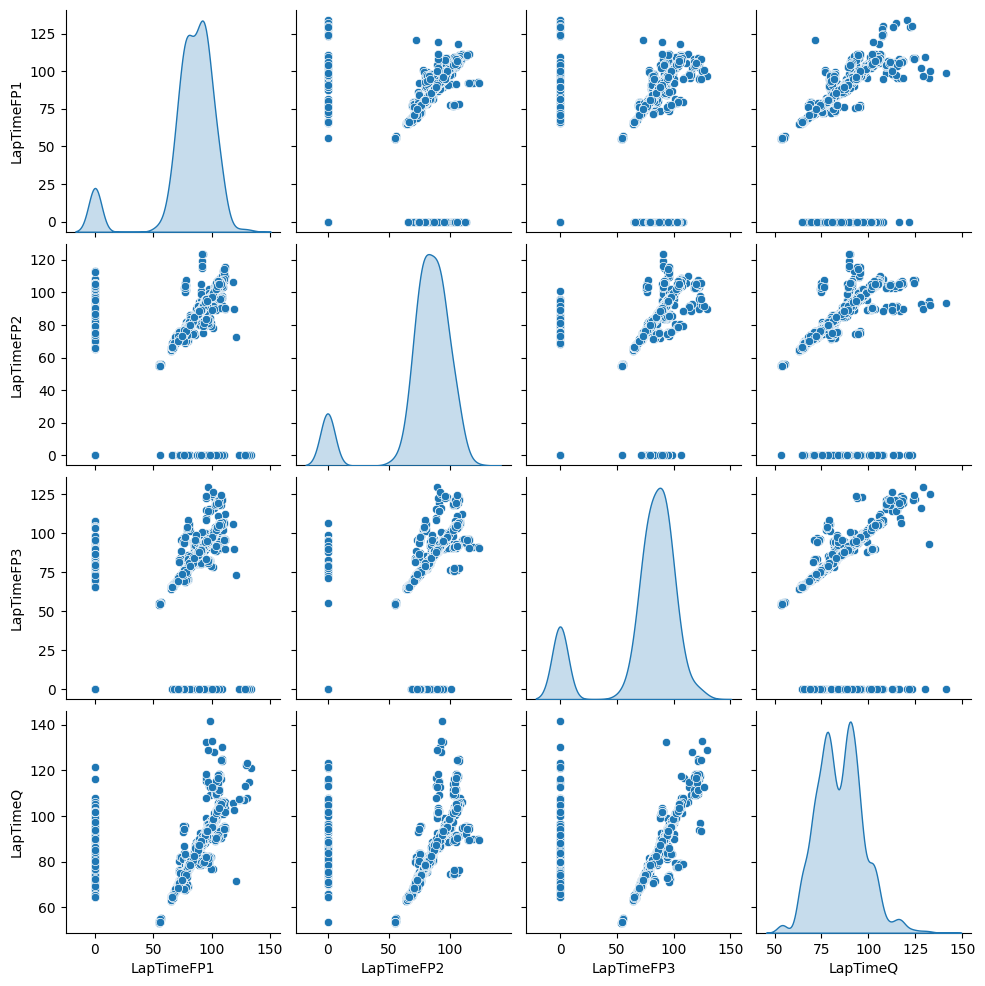

In [10]:
sns.pairplot(train_data[['LapTimeFP1', 'LapTimeFP2', 'LapTimeFP3', 'LapTimeQ']], diag_kind='kde')

In [11]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LapTimeFP1,2025.0,80.743361,25.584561,0.000,75.689,85.933,95.135,134.002
CompoundFP1,2025.0,1.387654,0.919887,0.000,1.000,1.000,2.000,5.000
AirTempFP1,2025.0,22.091951,8.059555,0.000,18.800,23.100,27.500,36.200
RainfallFP1,2025.0,0.039012,0.193672,0.000,0.000,0.000,0.000,1.000
TrackTempFP1,2025.0,33.899111,13.054362,0.000,26.900,37.000,42.300,59.200
FP1_Missing_Flag,2025.0,0.073580,0.261151,0.000,0.000,0.000,0.000,1.000
LapTimeFP2,2025.0,77.695657,27.399511,0.000,74.189,83.148,92.812,123.821
CompoundFP2,2025.0,1.203951,0.811469,0.000,1.000,1.000,1.000,5.000
AirTempFP2,2025.0,21.755210,8.439677,0.000,19.300,23.400,27.100,37.900
RainfallFP2,2025.0,0.027654,0.164021,0.000,0.000,0.000,0.000,1.000


# Model Prep

In [12]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('LapTimeQ')
test_labels = test_features.pop('LapTimeQ')

### Normalization

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(train_features))

In [15]:
normalizer.mean.numpy()

array([[8.0743362e+01, 1.3876543e+00, 2.2091951e+01, 3.9012346e-02,
        3.3899113e+01, 7.3580250e-02, 7.7695656e+01, 1.2039506e+00,
        2.1755209e+01, 2.7654322e-02, 3.2089039e+01, 2.3703704e-02,
        7.4070938e+01, 1.2360494e+00, 1.9925728e+01, 3.5061728e-02,
        3.0176395e+01, 2.3703704e-02, 2.3417877e+01, 4.1481480e-02,
        1.2148148e-01, 3.4158025e+00, 3.3748147e+00, 2.6385186e+00,
        3.1767902e+00, 2.9506173e+00, 3.1688888e+00, 3.6632099e+00,
        3.2701235e+00]], dtype=float32)

# DNN Model

In [16]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [17]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ ?                           │              59 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59 (240.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 59 (240.00 B)

In [18]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.1,
    verbose=0, epochs=250)

CPU times: total: 7.86 s
Wall time: 19.5 s


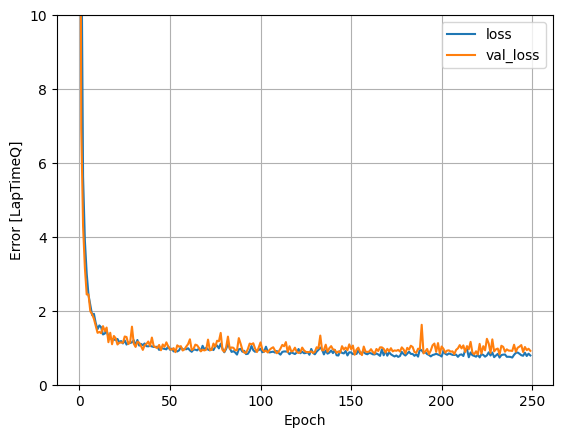

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [LapTimeQ]')
plt.legend()
plt.grid(True)

In [20]:
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 29)                  │              59 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,024 (191.51 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 59 (240.00 B)

 Optimizer params: 32,644 (127.52 KB)

### Save Results

In [21]:
test_results = pd.DataFrame()

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [22]:
test_results.to_csv('dnn_model.csv')

In [23]:
dnn_model.save('dnn_model.keras')

### Evaluation

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


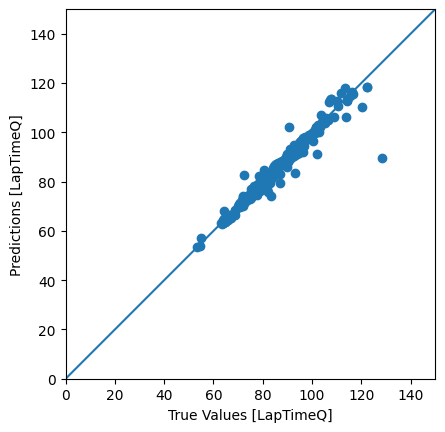

In [24]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [LapTimeQ]')
plt.ylabel('Predictions [LapTimeQ]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

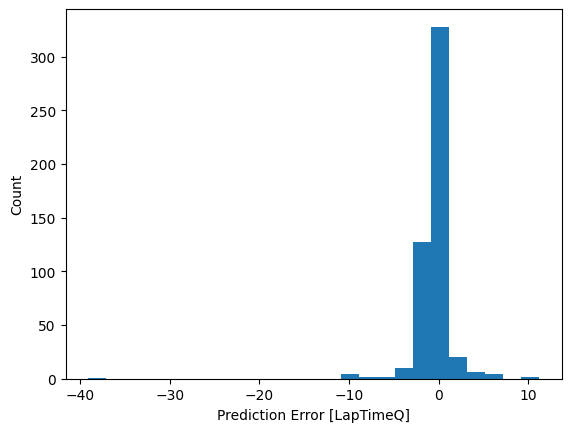

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')

In [52]:
con = MySQLConnection(port, database, user, password, server)

lap_data_test = con.run_query(query='''
    SELECT
        DriverNumber,
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END AS FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        CASE WHEN isnull(LapTimeFP3) THEN 1 ELSE 0 END AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM ml_project_prod.cleaned_session_data
    WHERE
	event_cd = 33 and
    year = 2024
    ''')

In [53]:
test_features_actual = lap_data_test.copy()
test_labels_actual = test_features_actual[['LapTimeQ', 'DriverNumber']]
test_features_actual.pop('LapTimeQ')

0     87.472
1     89.479
2     87.807
3     87.846
4     87.791
5     88.250
6     89.526
7     89.020
8     88.547
9     88.980
10    89.055
11    89.025
12    89.475
13    88.642
14    88.132
15    88.460
16    88.316
17    89.179
18    88.089
Name: LapTimeQ, dtype: float64

In [54]:
predict_df = pd.DataFrame()
for i in range(len(test_features_actual)):
    vals = pd.DataFrame()
    temp = test_features_actual.iloc[i].to_frame().transpose()
    temp = temp.astype(float)
    predicted_time = dnn_model.predict(temp.drop(['DriverNumber'], axis = 1)).flatten()
    vals['DriverNumber'] = temp['DriverNumber']
    vals['predicted_time'] = predicted_time
    predict_df = pd.concat([predict_df, vals])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [55]:
predict_df = predict_df.sort_values('predicted_time')
predict_df['Predicted_POS'] = predict_df['predicted_time'].rank(method='first')

In [56]:
test_labels_actual = test_labels_actual.sort_values('LapTimeQ')
test_labels_actual['actual_POS'] = test_labels_actual['LapTimeQ'].rank(method='first')

In [57]:
final_df = pd.merge(test_labels_actual, predict_df, on='DriverNumber')

final_df

,LapTimeQ,DriverNumber,actual_POS,predicted_time,Predicted_POS
0,87.472,1,1.0,87.358025,2.0
1,87.791,16,2.0,87.472801,3.0
2,87.807,11,3.0,87.668686,6.0
3,87.846,14,4.0,87.517242,5.0
4,88.089,81,5.0,88.099197,10.0
5,88.132,4,6.0,87.972008,9.0
6,88.250,18,7.0,87.825333,7.0
7,88.316,63,8.0,87.508041,4.0
8,88.460,44,9.0,87.870605,8.0
9,88.547,22,10.0,88.339401,12.0


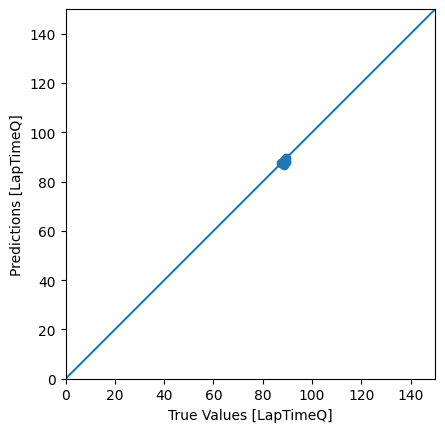

In [50]:
a = plt.axes(aspect='equal')
plt.scatter(final_df['LapTimeQ'], final_df['predicted_time'])
plt.xlabel('True Values [LapTimeQ]')
plt.ylabel('Predictions [predicted_time]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

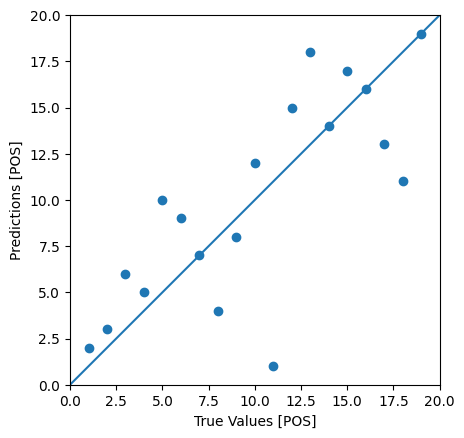

In [59]:
a = plt.axes(aspect='equal')
plt.scatter(final_df['actual_POS'], final_df['Predicted_POS'])
plt.xlabel('True Values [POS]')
plt.ylabel('Predictions [POS]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

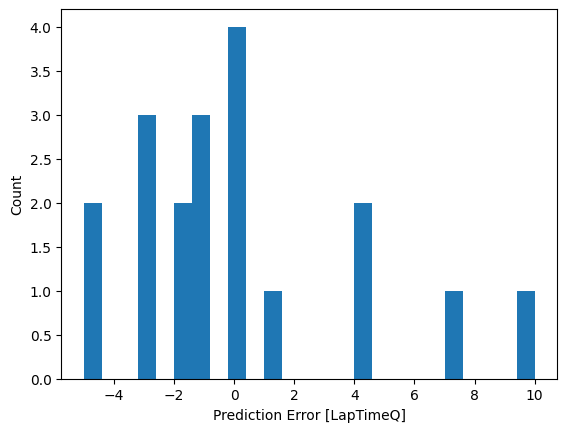

In [60]:
error = final_df['actual_POS'] - final_df['Predicted_POS']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')

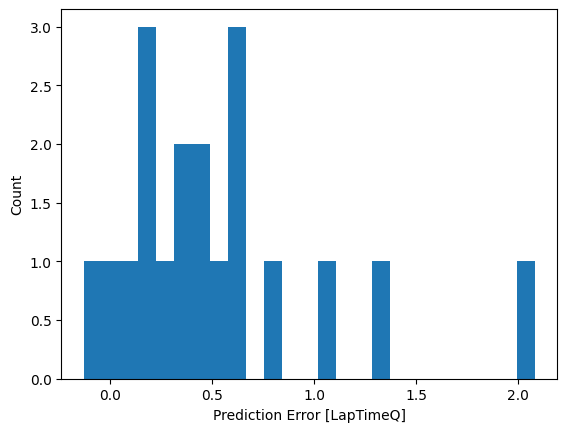

In [61]:
error = final_df['LapTimeQ'] - final_df['predicted_time']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')